<a href="https://colab.research.google.com/github/Zarif-SBU/Happiness-Report/blob/main/World_Happiness_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer

# **DATA CLEANING**

In [ ]:
# 2015 to 2018 is training set and 2019 is test set

# Save all csv data from 2015 till 2019 into panda dataframe
data_2015 = pd.read_csv("/content/2015.csv")
data_2016 = pd.read_csv("/content/2016.csv")
data_2017 = pd.read_csv("/content/2017.csv")
data_2018 = pd.read_csv("/content/2018.csv")
data_2019 = pd.read_csv("/content/2019.csv")


# The table below gives the column names of every dataframe. Any column/data not shared between all dataframes are listed in the rightmost side past the |.
# Columns with the same data but different names are stacked on top of each other

# 2015: Country               Happiness Rank  Happiness Score  Economy(GDP per Capita)   Family          Health(Life Expectency)  Freedom                        Trust(Government Corruption)              Generosity  |  Dystopia Residual  Standard Error                                        Region
# 2016: Country               Happiness Rank  Happiness Score  Economy(GDP per Capita)   Family          Health(Life Expectency)  Freedom                        Trust(Government Corruption)              Generosity  |  Dystopia Residual  Lower Confidence Interval  Upper Confidence Interval  Region
# 2017: Country               Happiness.Rank  Happiness.Score  Economy..GDP.per.Capita.  Family          Health..Life.Expectency  Freedom                        Trust..Government.Corruption.             Generosity  |  Dystopia.Residual  Whisker.high               Whisker.low
# 2018: Country or region     Overall rank    Score            GDP per capita            Social support  Healthy Life expectency  Freedom to make life choices   Perception of Perceptions of corruption   Generosity  |
# 2019: Country or region     Overall rank    Score            GDP per capita            Social support  Healthy Life expectency  Freedom to make life choices   Perception of Perceptions of corruption   Generosity  |


# We rename the columns in each dataframe to have a standardized naming system
# The following columns are kept in each dataframe: Country, Overall rank, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices and perceptions of corruption
# The following columns were dropped as not all dataframes had that data: Dystopia Residual, Standard Error, Region, Lower Confidence Interval, Upper Confidence Interval, Whisker.high, Whisker.low
data_2015 = data_2015.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Overall rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption'
})
data_2015 = data_2015.drop(columns=['Dystopia Residual', 'Standard Error', 'Region'])

data_2016 = data_2016.rename(columns={
    'Country': 'Country',
    'Happiness Rank': 'Overall rank',
    'Happiness Score': 'Score',
    'Economy (GDP per Capita)': 'GDP per capita',
    'Family': 'Social support',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust (Government Corruption)': 'Perceptions of corruption'
})
data_2016 = data_2016.drop(columns=['Dystopia Residual', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Region'])


data_2017 = data_2017.rename(columns={
    'Country': 'Country',
    'Happiness.Rank': 'Overall rank',
    'Happiness.Score': 'Score',
    'Economy..GDP.per.Capita.': 'GDP per capita',
    'Family': 'Social support',
    'Health..Life.Expectancy.': 'Healthy life expectancy',
    'Freedom': 'Freedom to make life choices',
    'Trust..Government.Corruption.': 'Perceptions of corruption'
})
data_2017 = data_2017.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'])

data_2018 = data_2018.rename(columns={'Country or region': 'Country'})
data_2019 = data_2019.rename(columns={'Country or region': 'Country'})

# Standardize country names to lowercase to avoid case sensitivity issues when performing data analysis
data_2015['Country'] = data_2015['Country'].str.lower()
data_2016['Country'] = data_2016['Country'].str.lower()
data_2017['Country'] = data_2017['Country'].str.lower()
data_2018['Country'] = data_2018['Country'].str.lower()
data_2019['Country'] = data_2019['Country'].str.lower()

# Few countires had inconsistant names between each csv files as such we manually standardize the names
# These countries were trinidad and tobago, northern cyprus, taiwan and hong kong

data_2015['Country'] = data_2015['Country'].replace('trinidad and tobago', 'trinidad & tobago')
data_2016['Country'] = data_2016['Country'].replace('trinidad and tobago', 'trinidad & tobago')
data_2017['Country'] = data_2017['Country'].replace('trinidad and tobago', 'trinidad & tobago')

data_2015['Country'] = data_2015['Country'].replace('north cyprus', 'northern cyprus')
data_2016['Country'] = data_2016['Country'].replace('north cyprus', 'northern cyprus')
data_2017['Country'] = data_2017['Country'].replace('north cyprus', 'northern cyprus')

data_2017['Country'] = data_2017['Country'].replace('taiwan province of china', 'taiwan')
data_2017['Country'] = data_2017['Country'].replace('hong kong s.a.r., china', 'hong kong')


df_big_countries = data_2019['Country'] #Here we create a new column dataframe that consists of only the country names from the 2019 dataset

merged_2015 = pd.merge(df_big_countries, data_2015, left_on='Country', right_on='Country', how='left')

merged_2015 = merged_2015.sort_values(by='Overall rank', ascending=True)  #Here we merge the 2015 dataset with the single column dataframe of 2019 country names and merge it based on left dataframe (df_big_countries)
                                                                          #Then we sort the data by rank from the least numerical value to the greatest (highest rank to lowest rank)
merged_2015.to_csv('merged_2015.csv', index=False)

merged_2016 = pd.merge(df_big_countries, data_2016, left_on='Country', right_on='Country', how='left')

merged_2016 = merged_2016.sort_values(by='Overall rank', ascending=True)  #Here we merge the 2016 dataset with the single column dataframe of 2019 country names and merge it based on left dataframe (df_big_countries)
                                                                          #Then we sort the data by rank from the least numerical value to the greatest (highest rank to lowest rank)
merged_2016.to_csv('merged_2016.csv', index=False)

merged_2017 = pd.merge(df_big_countries, data_2017, left_on='Country', right_on='Country', how='left')

merged_2017 = merged_2017.sort_values(by='Overall rank', ascending=True)  #Here we merge the 2017 dataset with the single column dataframe of 2019 country names and merge it based on left dataframe (df_big_countries)
                                                                          #Then we sort the data by rank from the least numerical value to the greatest (highest rank to lowest rank)
merged_2017.to_csv('merged_2017.csv', index=False)

merged_2018 = pd.merge(df_big_countries, data_2018, left_on='Country', right_on='Country', how='left')

merged_2018 = merged_2018.sort_values(by='Overall rank', ascending=True)  #Here we merge the 2018 dataset with the single column dataframe of 2019 country names and merge it based on left dataframe (df_big_countries)
                                                                          #Then we sort the data by rank from the least numerical value to the greatest (highest rank to lowest rank)
merged_2018.to_csv('merged_2018.csv', index=False)

merged_2019 = pd.merge(df_big_countries, data_2019, left_on='Country', right_on='Country', how='left')

merged_2019 = merged_2019.sort_values(by='Overall rank', ascending=True)  #Here we make a dataframe that consists only of the 2019 data for convienience
merged_2019.to_csv('merged_2019.csv', index=False)


**Process:**

Here we first load the CSVs into 5 data frames data_2015, data_2016, data_2017, data_2018, data_2019. We noticed that not all datasets had the same namings for the columns consisting of the data. We decided to standardize the naming but making it match the column names in the 2019 dataset. We also noticed that the datasets had varying column data. Some datasets included Dystopian Residual, Region, Standard Error, Confidence Interval data, and whiskers data. We decided to standardized the type of data in the dataframes by following only what data was found in the 2019 dataset and dropped the rest. We made sure to convert all country names to lowercase. Additionally, some countries in the datasets had differing naming conventions. One example is Trinidad & Tobago. In 2015-2017 Trinidad & Tobago is written as Trinidad and Tobago. We decided to follow the naming conventions found in the 2019 dataset. Finally, we created a singular column dataframe of all the country names in the 2019 dataset. We merged each years dataset with this column and merged based on the 2019 column country names. This meant each new dataframe we created from merging would have the data from that respective year (2015-2018) but only for the countries that are included in the 2019 dataset.

**Contributor**: William, Aditya, Zarif

# **MOST STABLE AND IMPROVED COUNTRIES**

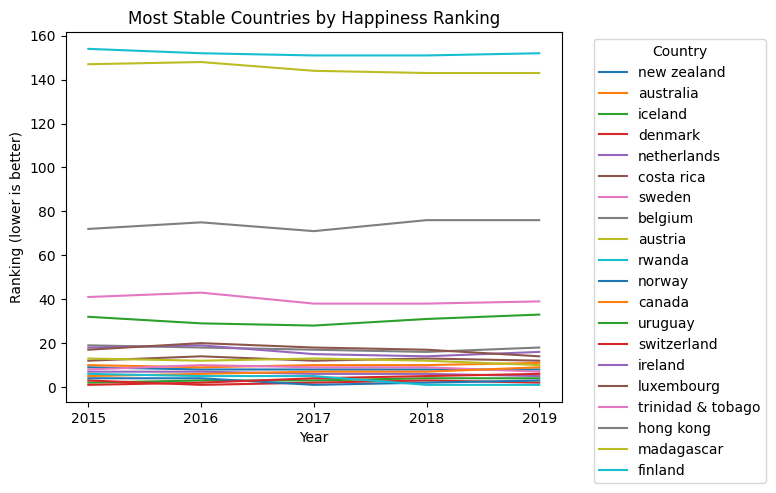

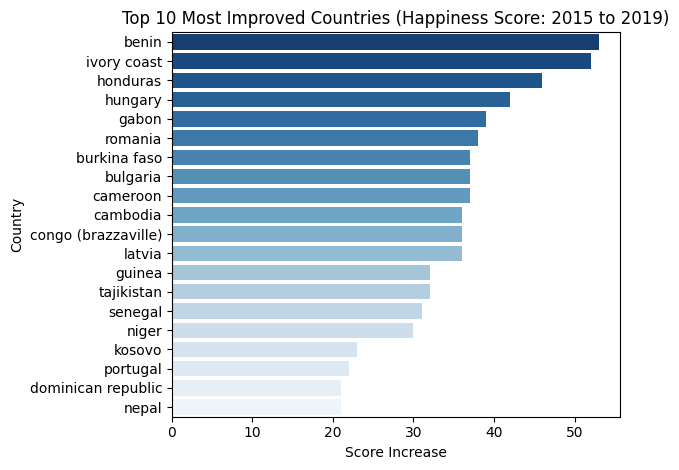

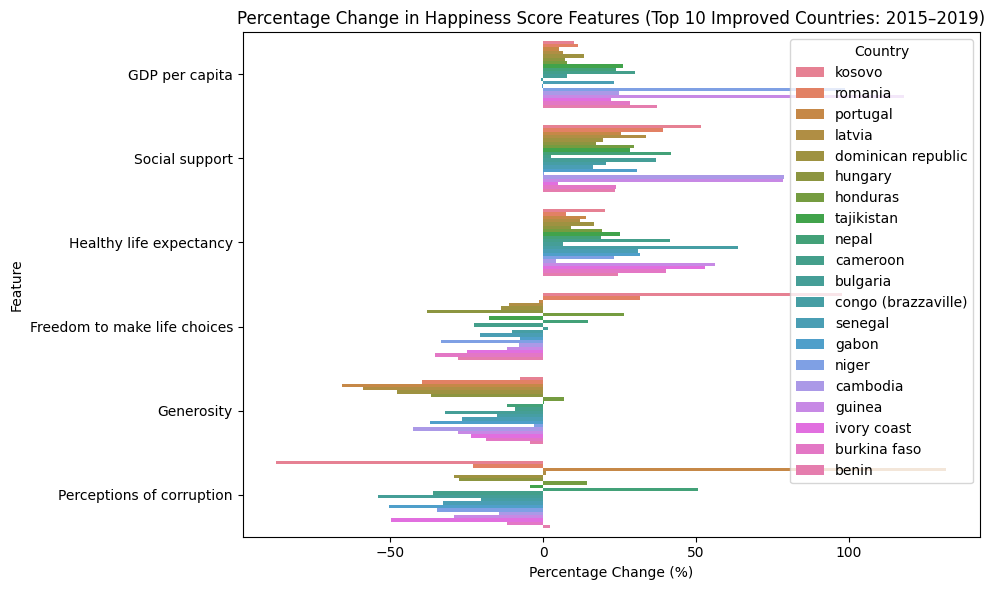

In [ ]:
# Countries with the most stable rankings
ranking_per_year = pd.DataFrame() # Create a new dataframe storing each country and their rankings each year
ranking_per_year['Country'] = data_2015['Country']
# for each country get their ranking in 2016 till 2019 and store it in the dataframe
ranking_per_year['2015'] = data_2015['Overall rank']
ranking_per_year['2016'] = ranking_per_year['Country'].map(data_2016.set_index('Country')['Overall rank'])
ranking_per_year['2017'] = ranking_per_year['Country'].map(data_2017.set_index('Country')['Overall rank'])
ranking_per_year['2018'] = ranking_per_year['Country'].map(data_2018.set_index('Country')['Overall rank'])
ranking_per_year['2019'] = ranking_per_year['Country'].map(data_2019.set_index('Country')['Overall rank'])

# drop any countries who are missing ranking in one or more years
ranking_per_year = ranking_per_year.dropna()
ranking_per_year['std_dev'] = ranking_per_year[['2015', '2016', '2017', '2018', '2019']].std(axis=1) # For each country find the variation in rankings between each year
stable = ranking_per_year.sort_values(by='std_dev', ascending=True).head(20) # save the top 10 most stable countries

ranking_per_year['rank_change_2015_to_2019'] = ranking_per_year['2015'] - ranking_per_year['2019'] # Create a new column with the change in rankings from 2015 till 2019
increasing = ranking_per_year.sort_values(by='rank_change_2015_to_2019', ascending=False).head(20) # Save the top 10 countries with the greatest increase in ranking

years = ['2015', '2016', '2017', '2018', '2019']
for index, row in stable.iterrows():
    plt.plot(years, row[years], label=row['Country'])

#Plot the top most stable countries
plt.title('Most Stable Countries by Happiness Ranking')
plt.xlabel('Year')
plt.ylabel('Ranking (lower is better)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the top 10 countries with the greatest increase in rankings
sns.barplot(data=increasing, x='rank_change_2015_to_2019', y='Country', hue='Country', palette='Blues_r')
plt.title('Top 10 Most Improved Countries (Happiness Score: 2015 to 2019)')
plt.xlabel('Score Increase')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Filter and merge 2015 & 2019 data
h2015 = data_2015[['Country'] + features]
h2019 = data_2019[['Country'] + features]

delta = h2015.merge(h2019, on='Country', suffixes=('_2015', '_2019'))
delta = delta[delta['Country'].isin(increasing['Country'])]

# Calculate percentage change
for feature in features:
    delta[f'{feature}_pct_change'] = (
        (delta[f'{feature}_2019'] - delta[f'{feature}_2015']) /
        abs(delta[f'{feature}_2015'])
    ) * 100

# Melt for plotting
delta_pct_melted = delta.melt(id_vars='Country',
                              value_vars=[f'{f}_pct_change' for f in features],
                              var_name='Feature', value_name='Pct_Change')
delta_pct_melted['Feature'] = delta_pct_melted['Feature'].str.replace('_pct_change', '')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=delta_pct_melted, x='Pct_Change', y='Feature', hue='Country')
plt.title('Percentage Change in Happiness Score Features (Top 10 Improved Countries: 2015–2019)')
plt.xlabel('Percentage Change (%)')
plt.tight_layout()
plt.show()


The way to calculate the stability of a country's ranking is by taking the standard deviation of rankings throughout the years for each country. The standard deviation helps quantify the variability in ranking over the years which is why we used it as our measurement for stability. From our results above, we find that the most stable countries usually have a very high ranking, except for Rwanda which interestingly stands out for having consistently low ranking.

To calculate the increase in ranking we just took the difference between each country's rankings in 2015 and their rankings in 2019. Many countries have had very high increase in rankings from 2015 to 2019, with the top 10 countries seeing a 30+ increase in position

**Contributors**: Zarif

# **FEATURES THAT CONTRIBUTE MOST TO HAPPINESS**

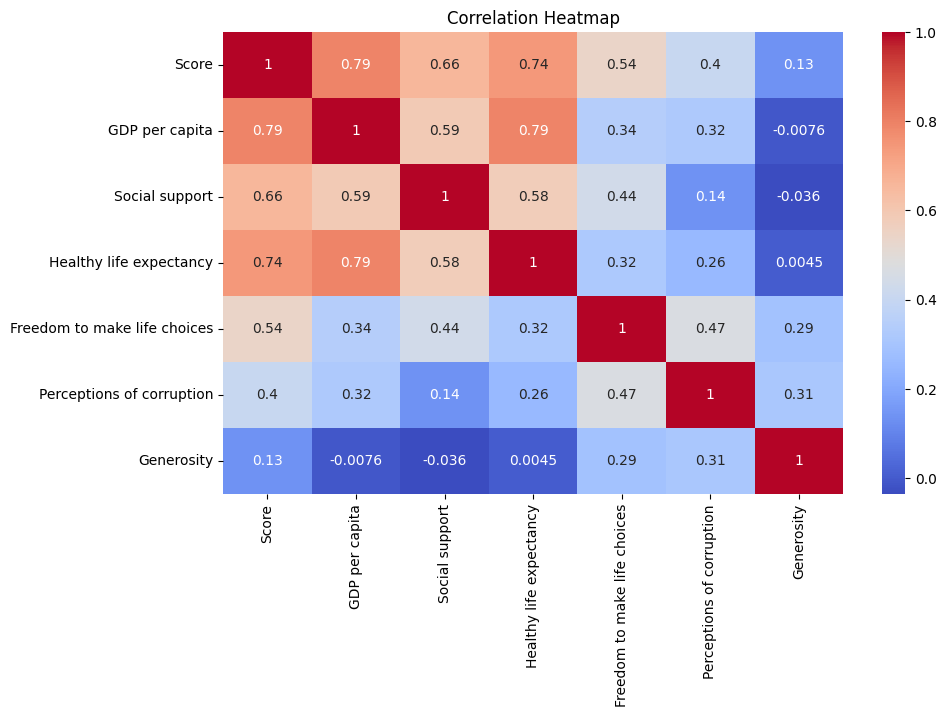

In [ ]:
# Features that contribute most to happiness
df_2015_to_2019 = pd.concat([merged_2015, merged_2016, merged_2017, merged_2018, merged_2019]).drop(columns=['Country', 'Overall rank'])
plt.figure(figsize=(10, 6))
sns.heatmap(df_2015_to_2019.corr(), annot=True, cmap='coolwarm') # .corr helps find the covariance matrix of our features
plt.title('Correlation Heatmap')
plt.show()

From the covariance matrix above we see that the features that most contribute towards happiness score is **GDP per capita, Healthy life expectency, Social support and Freedom to make life choices** which all have a correlation coefficient above .5.

**Contributors**: Zarif

# **CENTRAL TENDENCIES OF HAPPINESS SCORE**

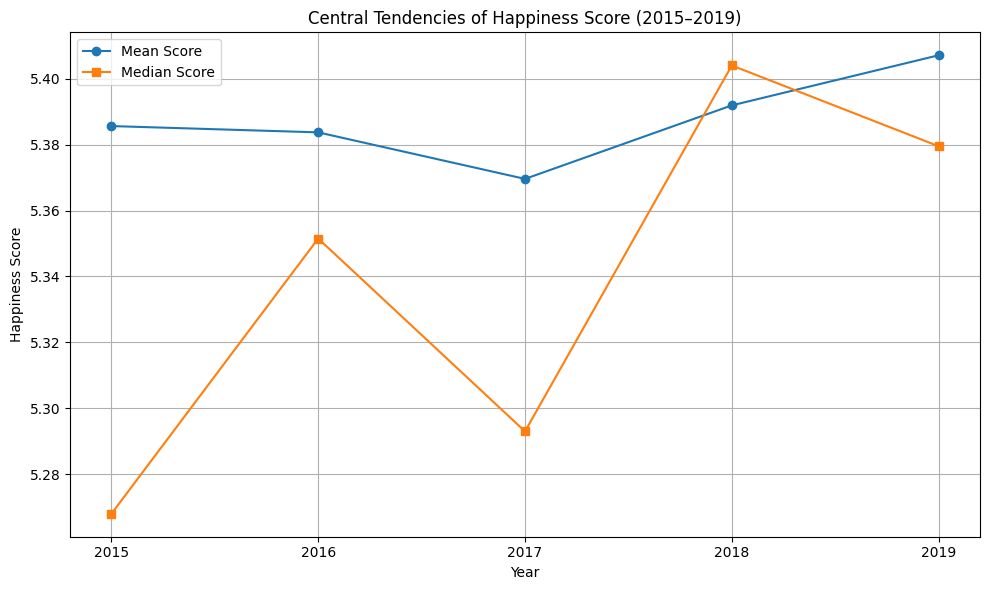

In [ ]:
merged_dataframes = [merged_2015, merged_2016, merged_2017, merged_2018, merged_2019] #Iterable array of the dataframes
years = [2015, 2016, 2017, 2018, 2019]  #Array of years

mean_scores = []
median_scores = []

for df in merged_dataframes:    #Iterate through the dataframes and get the mean and median happiness scores for each year
    mean_scores.append(df['Score'].mean())
    median_scores.append(df['Score'].median())

#Plot mean and median happiness scores for the years
plt.figure(figsize=(10, 6))
plt.plot(years, mean_scores, marker='o', label='Mean Score')
plt.plot(years, median_scores, marker='s', label='Median Score')
plt.title("Central Tendencies of Happiness Score (2015–2019)")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.xticks(years)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Process:**

Here we found the trends of the central tendencies of happiness scores over the years (2015-2019). We found the best tool for this was plotting how the mean and median of the happniess scores changed over the years. As we can see from the resulting plot, the overall trend of the median and mean happiness score is trending upwards and is positive.

**Contributors**: Aditya

# **DISTRIBUTION OF HAPPNIESS SCORES**

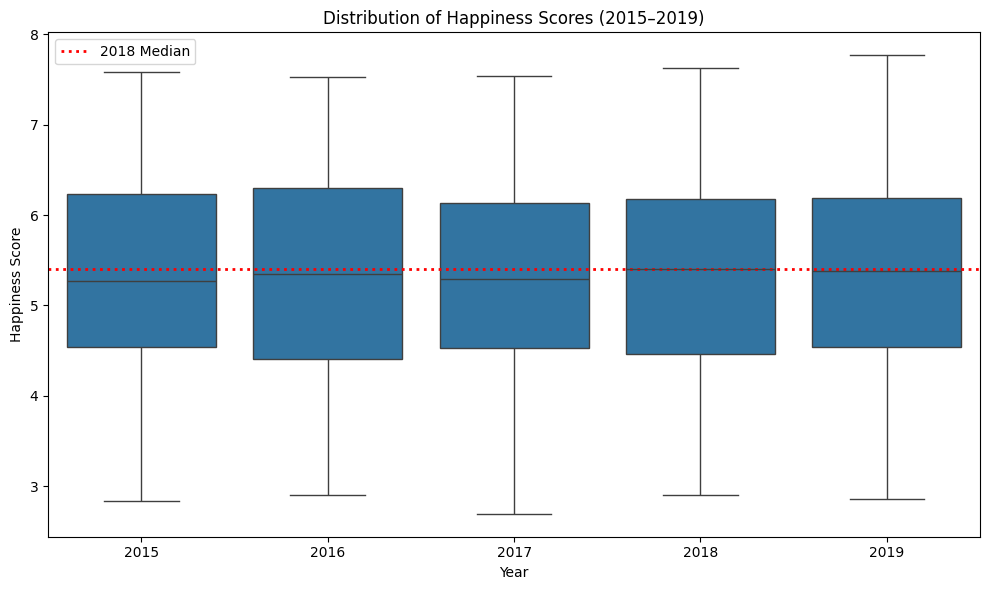

In [ ]:
merged_2015['Year'] = "2015"      #Add a year column to each dataframe that consists of their respective year
merged_2016['Year'] = "2016"
merged_2017['Year'] = "2017"
merged_2018['Year'] = "2018"
merged_2019['Year'] = "2019"

combined_df = pd.concat([merged_2015, merged_2016, merged_2017, merged_2018, merged_2019],ignore_index=True)  #Combine the individual year dataframes into one combined dataframe

plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Score', data=combined_df)  #Plot the boxplot with the combined dataframe data

median_2018 = combined_df[combined_df['Year'] == '2018']['Score'].median() #Find the median of year 2018 separately as this has the highest median

plt.axhline(median_2018, color='red', linestyle=':', linewidth=2, label='2018 Median')  #Plot a dotted line that goes through 2018 median and stretches the entirety of the plot
                                                                                        #This helps visualize how far below the other years medians are

plt.title('Distribution of Happiness Scores (2015–2019)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend()
plt.tight_layout()
plt.show()

**Process:**

Here we thought it would be good to see the distributions of happiness scores over the years (2015-2019). We added a year column to each respective dataframe. Then we merged all the data into one combined dataframe and plotted the box and whiskers plot. Additonally, we added a red dotted line that goes through the highest median happiness score in 2018, in order to get a better visualization of how much lower the other medians were. Here we can see that 2015 had the lowest median happiness score. Furthermore, we can see that 2016 has the biggest box which means the greatest variance in happiness scores comes from this data.

**Contributors**: Aditya

# **TRENDS OF OTHER CORRELATED FEATURES**

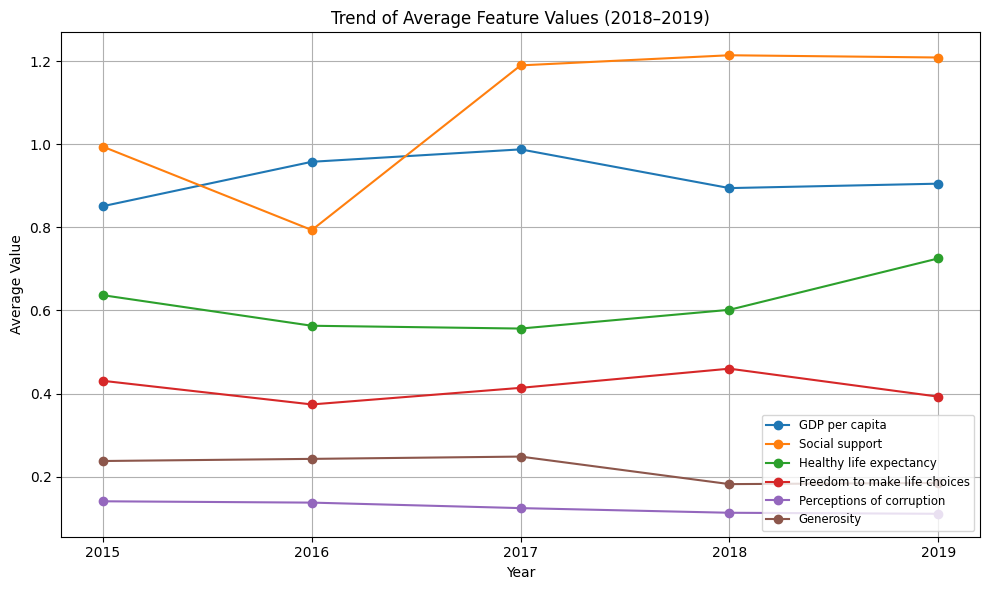

In [ ]:
#Array of features from the names of the columns in 2019 csv
features = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Perceptions of corruption',
    'Generosity'
]

#Average each of the features in the columns, doing the mean for each of the features
avg_2015 = merged_2015[features].mean()
avg_2016 = merged_2016[features].mean()
avg_2017 = merged_2017[features].mean()
avg_2018 = merged_2018[features].mean()
avg_2019 = merged_2019[features].mean()

#Create dataframe for each average feature for the specific years for plotting
avg_features = pd.DataFrame({'2015': avg_2015, '2016': avg_2016, '2017': avg_2017, '2018': avg_2018, '2019': avg_2019})
avg_features = avg_features.T  # Transpose for line plot formatting

#Plot a line plot to showcase the trend for each of the years for the specific feature
plt.figure(figsize=(10, 6))
#Loop through each of the features to mark and plot for the specific year
for feature in avg_features.columns:
    plt.plot(avg_features.index, avg_features[feature], marker='o', label=feature)

plt.title("Trend of Average Feature Values (2018–2019)")
plt.xlabel("Year")
plt.ylabel("Average Value")
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()
plt.show()

We wanted to observe how the importance of features changed across the years. We believe that through observing this, we can see how important some features can be to relate towards a better happiness score, such as if years with higher happiness scores had a higher social support for example.

To accomplish this, we firstly averaged each of the features of happiness for each specific year. Once that was done, we chose a line plot to display these changes as it can demonstrate best features of trends. We displayed the mean of each of the features per year where the X-axis represented the years (from 2015-2019) and then Y-axis represented the average values.

From the plot, it was observed that generally as the years went by, there was a heavy increase in the importance of social support, healthy life expectancy, and freedom to make choices. For those years where there was an increase in happiness from 2017-2019, it saw a high increase in those features, perhaps explaining the value of these 3 features in relating towards a higher happiness score.


**Contributors**: William

# **MODEL 1 TRAINING AND PREDICTIONS (HAPPINESS SCORE)**

RMSE HAPPINESS SCORE: 0.55


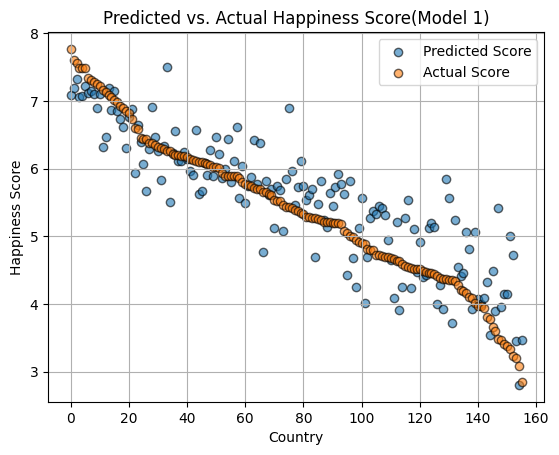

In [ ]:
#MODEL 1
# Combine training datasets (2015–2018)
train_df = pd.concat([merged_2015, merged_2016, merged_2017, merged_2018], ignore_index=True)
test_df = data_2019.copy()

#Here we define the features that we want this model to have and the target variable
features = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']
target = 'Score'

#Here we drop any rows with missing data
train_df = train_df.dropna()
test_df = test_df.dropna()

#Here we create the trainning and testing datasets
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"RMSE HAPPINESS SCORE: {rmse:.2f}")

#Here we plot a scatter plot that shows the actual scores vs. predicted scores
plt.scatter(X_test.index, y_pred, alpha=0.6, edgecolors='k', label='Predicted Score')
plt.scatter(X_test.index, y_test, alpha=0.6, edgecolors='k', label='Actual Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Predicted vs. Actual Happiness Score(Model 1)')
plt.legend()
plt.grid(True)
plt.show()

**Process:**

First we determined the features we would like to select for this model. In this case we selected every avaiable feature GDP per capita, Social Support, Healthy Life Expectancy, Freedom to make life choices, Perceptions of corruption, and Generosity. We divide up the data in training and testing sets. We trained the model and made predictions for the happiness score. We calculated the RMSE score (average difference between the actual and predicted values) which we got 0.55. This means our model does decently well at predicting the happiness scores.

**Contributors**: Aditya



# **MODEL 2 TRAINING AND PREDICTIONS (HAPPINESS SCORE)**

RMSE HAPPINESS SCORE: 0.56


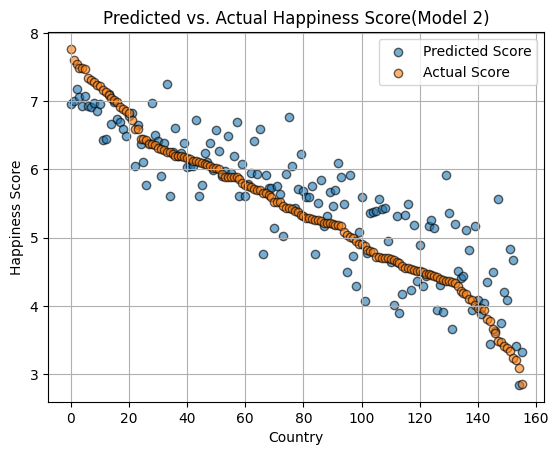

In [ ]:
#MODEL 2
#For model 2, we want to train and learn based on the most correlated features to hopefully obtain a different and better result
#For this one, we chose GDP, Social Support, Healthy Life Expenctancy, and Freedom to make life choices
features_model_2 = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']

#Create train and test dataframes based on the specific features taken to predict for 2019(utilizng our previously made df's)
X_train_2 = train_df[features_model_2]
y_train_2 = train_df[target]
X_test_2 = test_df[features_model_2]
y_test_2 = test_df[target]

#Create a linear regression model and fit it based on the training features we given it
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

#Obtain the predicted score values
y_pred_2 = model_2.predict(X_test_2)

#We then can calculate the RMSE through giving it the actual values of 2019 and our predicted values of 2019
mse = mean_squared_error(y_test_2, y_pred_2)
rmse = np.sqrt(mse)

print(f"RMSE HAPPINESS SCORE: {rmse:.2f}")

#Plot a scatterplot to showcase the difference between the actual values and predicted values
plt.scatter(X_test_2.index, y_pred_2, alpha=0.6, edgecolors='k', label='Predicted Score')
plt.scatter(X_test_2.index, y_test_2, alpha=0.6, edgecolors='k', label='Actual Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Predicted vs. Actual Happiness Score(Model 2)')
plt.legend()
plt.grid(True)
plt.show()

For Model 2, we wanted the learning algorithm to be focused on highly correlated features, choosing features with correlation of .5 or more. This is to help reduce overfitting due to removal of more irrelevant features for predicting the scores. For this model, the features that were chosen to train the model were GDP per capita, Social Support, Life Expectancy, and Freedom to make choices, as they showcased high correlation from our heatmap.

We then split the dataset into training and testing sets, where the training sets are the features listed above from 2015-2018 concatenated together while the testing set is 2019 data. We utilize our previous test, where we dropped rank and score as score is our target variable, and rank can help lead to score.

Once we trained our linear regression model based on our datasets and fitted it, the resulting RMSE was a score of 0.56. What this meant was that our predictions were fairly accurate, being on average 0.56 off from the actual values. The features chosen definitely relate heavily towards happiness, where we can say that these 4 features are essential in showcasing how happy a country is. This was, however, worse than our model 1, where it demonstrated a RMSE of 0.55.

We then plotted it to visually demonstrate our predictions utilizing a scatter plot


**Contributors**: William

# **MODEL 3 TRAINING AND PREDICTIONS (HAPPINESS SCORE)**

RMSE HAPPINESS SCORE: 0.65


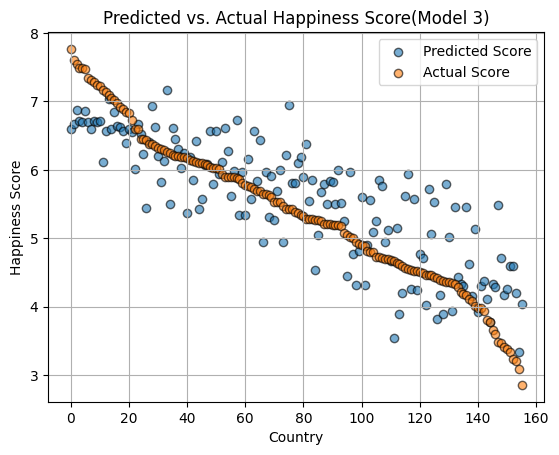

In [ ]:
#MODEL 3
#For model 3, the learning algorithm behind it follows Occam's Razor, that is we want to utilize the simpliest and least amount of features
#For this, we chosen the highest correlating values towards happiness being GDP and Healthly Life Expectancy
features_model_3 = ['GDP per capita', 'Healthy life expectancy']

#As before, create train and test dataframes based on the specific features taken to predict for 2019(utilizng our previously made df's)
X_train_3 = train_df[features_model_3]
y_train_3 = train_df[target]
X_test_3 = test_df[features_model_3]
y_test_3 = test_df[target]

#Create a linear regression model and fit our training data for it
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)

#The predicted score values based on the 2 features trained on
y_pred_3 = model_3.predict(X_test_3)

#We then can calculate the RMSE through giving it the actual values of 2019 and our predicted values of 2019
mse = mean_squared_error(y_test_3, y_pred_3)
rmse = np.sqrt(mse)

print(f"RMSE HAPPINESS SCORE: {rmse:.2f}")

#Plot a scatterplot to showcase the difference between the actual values and predicted values, giving it our predicted values calculated and the real values from the 2019 column
plt.scatter(X_test_3.index, y_pred_3, alpha=0.6, edgecolors='k', label='Predicted Score')
plt.scatter(X_test_3.index, y_test_3, alpha=0.6, edgecolors='k', label='Actual Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Predicted vs. Actual Happiness Score(Model 3)')
plt.legend()
plt.grid(True)
plt.show()

For Model 3, we wanted the learning algorithm to be focused on the most correlated features, following Occam’s Razor of utilizing the most simple and essential values for a model. The features chosen were GDP per Capita and Healthy Life Expectancy. This is to, again, help further reduce overfitting and hopefully filter out more noise that can be worse for prediction, seeing and keeping what we think is truly essential.

We then again split the dataset into training and testing sets, where the training sets are the features listed above from 2015-2018 concatenated together while the testing set is 2019 data. We utilize our previous test, where we dropped rank and score as score is our target variable, and rank can help lead to score.

Once we trained our linear regression model based on our datasets and fitted it, the resulting RMSE was a score of 0.65. This was the worst RMSE we got so far; yet, the result still meant that we were fairly accurate towards the RMSE. Though the features were important, it can be said for predicting the happiness in a country, there still needs to be more features.


**Contributors**: William

# **FINDING THE PREDICTED COUNTRY RANKS (MODEL 1)**

In [ ]:
# We make a copy of the 2019 data set where we add the predicted score as a new column
#MODEL 1: All of the features
final = data_2019.copy()
final["Predicted Score"] = y_pred

# Add predicted rank based on predicted score calculated, ranking the highest score at the top and the lowest at the bottom to get the actual predicted ranks
final["Predicted Rank"] = final["Predicted Score"].rank(ascending=False, method='min').astype(int)

# Sort by predicted rank and appending it towards our dataframe
final = final.sort_values(by="Predicted Rank")
actual_ranks = final["Overall rank"].astype(int)
predicted_ranks = final["Predicted Rank"].astype(int)

# Calculate RMSE for ranks to demonstrate how far we are from our predictions
rank_mse = mean_squared_error(actual_ranks, predicted_ranks)
rank_rmse = np.sqrt(rank_mse)

print(f"Rank RMSE: {rank_rmse:.2f}")
# Calculate R2 Score to put into perspective of our predictions, showcasing how accurate in a percentage they are
print(f"R2 Score: ", r2_score(actual_ranks, predicted_ranks))


final.to_csv("2019_prediction_1.csv", index=False)

Rank RMSE: 20.85
R2 Score:  0.785658516539963


**Process:**

Here we find the predicted ranks by ranking the predicted happiness scores we got from Model 1. The highest predicted happiness score gets rank 1 and we increment the rank all the way till the lowest happiness score which gets the last rank. Here we can see that the RMSE is 20.85 which means on average our predicted country ranks were off by 20.85. Additionally, we have a R2 score of 0.78 which means that we had about 78% accuracy in predicting the ranks. This was decent performance from our model. However, we thought we could improve more as seen in the next model.

**Contributors**: Aditya

# **FINDING THE PREDICTED COUNTRY RANKS (MODEL 2)**

In [ ]:
# We make a copy of the 2019 data set where we add the predicted score as a new column
#MODEL 2: Most Correlated Features
final = data_2019.copy()
final["Predicted Score"] = y_pred_2

# Add predicted rank based on predicted score, ranking the highest score at the top and the lowest at the bottom to get the actual predicted ranks
final["Predicted Rank"] = final["Predicted Score"].rank(ascending=False, method='min').astype(int)

# Sort by predicted rank and appending it towards our dataframe
final = final.sort_values(by="Predicted Rank")
actual_ranks = final["Overall rank"].astype(int)
predicted_ranks = final["Predicted Rank"].astype(int)

# # Calculate RMSE for ranks to demonstrate how far we are from our predictions
rank_mse = mean_squared_error(actual_ranks, predicted_ranks)
rank_rmse = np.sqrt(rank_mse)

print(f"Rank RMSE: {rank_rmse:.2f}")
# Calculate R2 Score to put into perspective of our predictions, showcasing how accurate in a percentage they are
print(f"R2 Score: ", r2_score(actual_ranks, predicted_ranks))


final.to_csv("2019_prediction_2.csv", index=False)

Rank RMSE: 20.57
R2 Score:  0.79126614088603


For finding the predicted country ranks for Model 2, it was done through ranking our predicted country scores which was obtained from model 2 of our linear regression.

To accomplish this, we sorted and ranked the predictions we got from model 2, putting it into its own column “Predicted Ranks”. Once done, we could calculate the RMSE and R2 score for our predicted ranks, where the values obtained were 20.57 and 0.79126614088603 respectively.

What this demonstrates is that our predicted ranks were on average 20.57 off and had an accuracy of about 79%. This is actually better than model 1’s predicted ranks where it utilized all features, showcasing that these 4 features are perhaps essential in a country’s happiness.


**Contributors**: William

# **FINDING THE PREDICTED COUNTRY RANKS (MODEL 3)**

In [ ]:
# We make a copy of the 2019 data set where we add the predicted score as a new column
#MODEL 3: Occam's Razor, 2 simpliest and highly correlated features
final = data_2019.copy()
final["Predicted Score"] = y_pred_3

# Add predicted rank based on predicted score, ranking the highest score at the top and the lowest at the bottom to get the actual predicted ranks
final["Predicted Rank"] = final["Predicted Score"].rank(ascending=False, method='min').astype(int)

# Sort by predicted rank and appending it towards our dataframe
final = final.sort_values(by="Predicted Rank")
actual_ranks = final["Overall rank"].astype(int)
predicted_ranks = final["Predicted Rank"].astype(int)

# Calculate RMSE for ranks to demonstrate how far we are from our predictions
rank_mse = mean_squared_error(actual_ranks, predicted_ranks)
rank_rmse = np.sqrt(rank_mse)

print(f"Rank RMSE: {rank_rmse:.2f}")
# Calculate R2 Score to put into perspective of our predictions, showcasing how accurate in a percentage they are
print(f"R2 Score: ", r2_score(actual_ranks, predicted_ranks))


final.to_csv("2019_prediction_3.csv", index=False)

For finding the predicted country ranks for Model 3, it was done through ranking our predicted country scores which was obtained from model 3 of our linear regression.

To accomplish this, we sorted and ranked the predictions we got from model 3, putting it into its own column “Predicted Ranks”. Once done, we could calculate the RMSE and R2 score for our predicted ranks, where the values obtained were 25.30 and 0.6842376444184539 respectively.

This was by far the worse results compared to the previous 2 models. This demonstrates how these two features are important; but generally, the country’s happiness needs more than just 2 features.


**Contributors**: William

# **Multi-Class Logistic Rigression**

In [ ]:
from sklearn.preprocessing import StandardScaler
features_model_log = ['GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']

# As before, create train and test dataframes based on the specific features taken to predict for 2019(utilizng our previously made df's)
X_train_log = train_df[features_model_log]
y_train_log = train_df['Overall rank']
X_test_log = test_df[features_model_log]
y_test_log = test_df['Overall rank']
scaler = StandardScaler()

model = LogisticRegression(solver='liblinear', max_iter=20000)
model.fit(X_train_log, y_train_log)

y_pred_log = model.predict(X_test_log)

mse = mean_squared_error(y_test_log, y_pred_log)
rmse = np.sqrt(mse)

print(f"RMSE HAPPINESS SCORE: {rmse:.2f}")

RMSE HAPPINESS SCORE: 42.75


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
features_model_forest = ['GDP per capita', 'Social support', 'Healthy life expectancy']
X_train_forest = train_df[features_model_forest]
y_train_forest = train_df['Overall rank']
X_test_forest = test_df[features_model_forest]
y_test_forest = test_df['Overall rank']

model = RandomForestClassifier(n_estimators=1000, random_state=42)
model.fit(X_train_forest, y_train_forest)

y_pred_forest = model.predict(X_test_forest)

mse = mean_squared_error(y_test_forest, y_pred_forest)
rmse = np.sqrt(mse)

print(f"RMSE HAPPINESS SCORE: {rmse:.2f}")

RMSE HAPPINESS SCORE: 35.80



# **DEVELOPING OUR OWN EQUATION**

In [ ]:
# Creating our own formula for predicting the happiness score
# We use the formula (X^T * X)^(-1) * X^T * y to calculate our coefficient
X = train_df.drop(columns=['Score', 'Overall rank', 'Country', 'Year']).values # We convert the cleaned dataframe into an array
y = train_df['Score'].values.reshape(-1, 1) # Save a 1 column array for score
X = np.hstack((np.ones((X.shape[0], 1)), X)) # Add a row of 1s for the bias term(constant term that allows the model)

X_T = np.transpose(X) # Get the transpose matrix of X

X_T_X = np.dot(X_T, X) # Get the dot product of X and X transpose

X_T_X_inv = np.linalg.inv(X_T_X) # Get inverse of the dot product

X_T_y = np.dot(X_T, y) # Get dot product of X transpose and y

w = np.dot(X_T_X_inv, X_T_y) # We get the final weights

x_2019 = test_df.drop(columns=['Score', 'Overall rank', 'Country']).values # We convert the cleaned dataframe into an array
x_2019 = np.hstack((np.ones((x_2019.shape[0], 1)), x_2019)) # Add a row of 1s for the bias term(constant term that allows the model)

y_2019 = test_df['Score'].values.reshape(-1, 1) # Save a 1 column array for score

y_pred = np.dot(x_2019, w) # Multiply the our data with the weights to get our predicted scores

mse = mean_squared_error(y_2019, y_pred)
rmse = np.sqrt(mse) # RMSE score
weights = w.flatten().round(4) # Convert our 7*1 array to 1*7 and round to 4 decimal points
print("Equation is: Score = GDP *", weights[1], "+ Social_support *", weights[2], "+ life_expecteny *", weights[3])
print( "+ Freedom_of_choice *", weights[4],"+ Generosity *", weights[5], "+ Perceptions_of_corruption *", weights[6], "+", weights[0] ) # Print out our the equaiton
print(f"RMSE: {rmse:.2f}")
print("r2_score")

plt.scatter(test_df.index, y_pred, alpha=0.6, edgecolors='k', label='Predicted Score')
plt.scatter(test_df.index, y_2019, alpha=0.6, edgecolors='k', label='Actual Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Predicted vs. Actual Happiness Score(Our Model)')
plt.legend()
plt.grid(True)
plt.show()

We use the equation (XTX)-1XTy which helps us analytically calculate the coefficients for our model. The resulting coefficients are used to make our linear regression line. Our RMSE score is .56 which is very close to our best models, models 1 and 2. The predicted scores follow the general trend of our actual scores as seen in the Predicted vs. Actual score graph above. We ended up keeping all of our features as that gave us the best RMSE score previously in Model 1 and after testing with other combinations of features, we found that having all features gives us the best score in our model as well.

**Contributors**: Zarif



---

